`미션 4주차`

* <데이터 특이사항>

오늘 활용할 데이터는 2022년까지의 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 입니다. 합계, 계 데이터는 제외하였으며 판매유형별 데이터에도 면세점 데이터는 제외하고 다운로드 받은 데이터 입니다. 해당 데이터를 통해 온라인쇼핑을 통한 해외직접판매액에 대한 분석을 진행해 주세요!


[원본데이터] 국가통계포털 : http://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

In [15]:
# 미션 풀이를 위한 준비 작업

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

df = pd.read_csv(
    "https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [16]:
# 데이터 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  2772 non-null   object
 1   상품군별     2772 non-null   object
 2   판매유형별    2772 non-null   object
 3   시점       2772 non-null   object
 4   데이터      2772 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 108.4+ KB


In [17]:
# 데이터 정보 요약
df.describe

<bound method NDFrame.describe of      국가(대륙)별        상품군별   판매유형별           시점   데이터
0         미국  컴퓨터 및 주변기기  면세점 이외     2017.1/4  1054
1         미국  컴퓨터 및 주변기기  면세점 이외     2017.2/4   946
2         미국  컴퓨터 및 주변기기  면세점 이외     2017.3/4   791
3         미국  컴퓨터 및 주변기기  면세점 이외     2017.4/4   854
4         미국  컴퓨터 및 주변기기  면세점 이외     2018.1/4  2033
...      ...         ...     ...          ...   ...
2767      기타         기 타  면세점 이외     2021.2/4  1278
2768      기타         기 타  면세점 이외     2021.3/4  1154
2769      기타         기 타  면세점 이외     2021.4/4  1076
2770      기타         기 타  면세점 이외     2022.1/4  2325
2771      기타         기 타  면세점 이외  2022.2/4 p)   725

[2772 rows x 5 columns]>

In [18]:
# 데이터 형태 미리보기
df.head()

,국가(대륙)별,상품군별,판매유형별,시점,데이터
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791
3,미국,컴퓨터 및 주변기기,면세점 이외,2017.4/4,854
4,미국,컴퓨터 및 주변기기,면세점 이외,2018.1/4,2033


In [19]:
# 컬럼명 보기
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '시점', '데이터'], dtype='object')

#  Q1. 시점 컬럼에서 연도와 분기에 대한 파생변수를 생성하고 기술통계를 구해주세요.

* 데이터 컬럼을 단위인 "백만"으로 변경해 주세요.
* describe() 로 기술통계를 구했을 때 다음과 같은 결과가 나오도록 합니다. 아래 결과는 예시로 소숫점 자리수가 다르게 표시되더라도 값이 같다면 괜찮습니다.
* 전처리한 백만, 연도, 분기 컬럼이 수치형 데이터 일 때 아래와 같은 결과가 나오니 데이터가 수치 형태로 되어 있는지도 확인해 주세요!
* 데이터는 위에서 제공된 데이터를 사용합니다.
* 해당 기술통계로 알 수 있는 정보가 무엇인지도 함께 작성해 주세요!

In [20]:
# 시점 컬럼 데이터 확인

df['시점'].unique()

array(['2017.1/4', '2017.2/4', '2017.3/4', '2017.4/4', '2018.1/4',
       '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4', '2019.2/4',
       '2019.3/4', '2019.4/4', '2020.1/4', '2020.2/4', '2020.3/4',
       '2020.4/4', '2021.1/4', '2021.2/4', '2021.3/4', '2021.4/4',
       '2022.1/4', '2022.2/4 p)'], dtype=object)

2017년부터 2022년 2/4까지 있는 것 확인 가능

In [21]:
# 컬럼명 바꾸기
df.rename(columns={'데이터':'백만'},inplace=True)

# 바뀐 컬럼명 확인
df.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '시점', '백만'], dtype='object')

In [22]:
# 연도와 분기 추출 전 데이터 확인
df.head(3)

,국가(대륙)별,상품군별,판매유형별,시점,백만
0,미국,컴퓨터 및 주변기기,면세점 이외,2017.1/4,1054
1,미국,컴퓨터 및 주변기기,면세점 이외,2017.2/4,946
2,미국,컴퓨터 및 주변기기,면세점 이외,2017.3/4,791


시점을 보면 '.'을 통해 연도와 분기가 구분되어 있음을 확인 가능


다시 분기는 '/'을 기준으로 구분되어있음

In [23]:
# 연도 컬럼 생성 및 데이터 추가

df['연도'] = df['시점'].map(lambda x: int(x.split('.')[0]))
df.sample(3)

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도
675,일본,소프트웨어,면세점 이외,2020.4/4,23,2020
62,미국,소프트웨어,면세점 이외,2021.3/4,193,2021
347,중국,가전·전자·통신기기,면세점 이외,2021.2/4,175,2021


In [24]:
# 분기 컬럼 생성 및 데이터 추가

df['분기'] = df['시점'].map(lambda x: int(x.split('.')[-1].split('/')[0]))
df.sample(3)

,국가(대륙)별,상품군별,판매유형별,시점,백만,연도,분기
624,일본,컴퓨터 및 주변기기,면세점 이외,2019.1/4,34,2019,1
1887,중남미,가전·전자·통신기기,면세점 이외,2021.2/4,155,2021,2
1992,중남미,의류 및 패션 관련상품,면세점 이외,2020.1/4,114,2020,1


In [25]:
# describe() 로 기술통계 구하기

df.describe()

,백만,연도,분기
count,2772.000000,2772.000000,2772.000000
mean,1613.116522,2019.272727,2.409091
std,4273.426107,1.600909,1.114533
min,-10003.000000,2017.000000,1.000000
25%,41.750000,2018.000000,1.000000
50%,291.500000,2019.000000,2.000000
75%,1181.000000,2021.000000,3.000000
max,47689.000000,2022.000000,4.000000


## 해당 기술통계로 알 수 있는 정보

* '백만'의 min이 -10003인 것을 볼 때, 이는 이상치임을 알 수 있음
* '백만'의 중앙값이 291.5, 평균이 1613, 최대가 47689인 것을 볼 때 평균이 최대값의 영향을 크게 받았음에도 
* 최대치에 비해 중앙값으로부터 평균이 멀리 전체적으로 보았을 때 상대적으로 멀리 떨어진 것 같지 않음
* 41 ~ 1181 까지 데이터의 50%가 있다는 것을 함께 고려한다면 10000 단위의 데이터들은 강하게 이상치로 의심받는 값들임


* 박스플롯을 그려서 상자 수염과 이상치를 확인해보자

<AxesSubplot:>

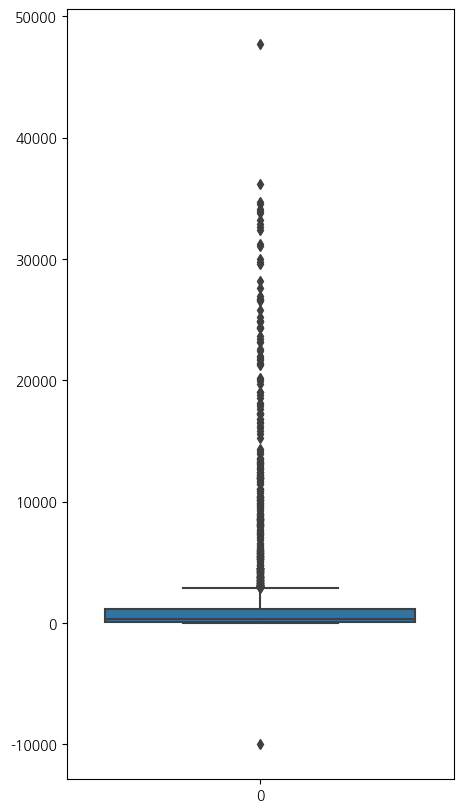

In [31]:
# boxplot으로 시각화

plt.figure(figsize=(5,10))
sns.boxplot(data=df['백만'])


위에서 예상한대로 상자 수염은 2000~3000 정도에서 끝남. 이상치로 의심되는 값들이 꽤 많음을 확인할 수 있음

또한 -10000이 이상치임을 함께 보여줌

# Q2. pivot_table을 사용하여 국가(대륙)별 연도별 판매액의 합계를 분석해 주세요.

* 국가(대륙)별 연도별 판매액의 합계를 구해서 어느 지역에 판매액이 많은지를 알아보겠습니다.
* pivot_table 을 사용하여 다음의 결과를 구하고 시각화 해주세요!
* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

# Q3. groupby를 사용하여 2020년의 온라인 해외판매 상품군을 지역별 합계를 구해 분석해 주세요.

* 2020년은 코로나로 인해 전국민이 어려움을 겪었던 시기입니다. 또, 아마존 등의 해외 온라인 판매가 늘어난 시기이기도 합니다. 이 때, 해외 어느지역에 온라인 판매가 얼마나 되었는지를 groupby() 와 unstack()을 활용해서 합계를 구하고 분석해 주세요! 또 분석한 결과를 보고 어떤 인사이트를 얻었는지도 함께 작성해 주세요!


* 그래프의 색상, 스타일은 자유롭게 원하는 스타일로 지정해도 됩니다.

# Q4. 주요 판매 국가와 상품군에 대해 2021년까지의 연도별 온라인 직접 판매액 합계를 시각화 해주세요.

* 온라인 직접 판매액이 높은 지역은 "미국", "중국", "일본" 이며, 주요 판매 상품군은 "의류 및 패션 관련상품", "화장품", "음반·비디오·악기" 입니다. 2021년까지의 각 지역별 제품별 판매액을 시각화 해주세요!


* 시각화 결과의 색상이나 스타일이나 스타일은 달라도 괜찮습니다

# Q5. KOSIS 에 있는 데이터를 하나 정해 자유롭게 분석해 주세요!

* 지금까지 익힌 방법으로 다른 데이터에도 같은 방법을 통해 분석해 볼 수 있을 것입니다.
* KOSIS(https://kosis.kr/) 사이트에서 관심있는 분야의 데이터를 찾고 원하는 시각화를 해주세요!
* 조회조건에 계, 합계 등을 미리 제거하고 다운로드 받으면 전처리를 줄일 수 있습니다.
* 행렬전환 기능을 사용하면 따로 melt를 진행하지 않아도 되기 때문에 이 또한 전처리를 줄일 수 있습니다.